In [1]:
import numpy as numpy
from scipy import stats
import pandas as pd
import math as math
import os

import matplotlib.pyplot as plt

In [2]:
#tratar csv aqui
csvMaoDireitaGoniometro = pd.read_csv("Dados Direita.csv", skiprows=0)
csvMaoEsquerdaGoniometro = pd.read_csv("Dados Esquerda.csv",skiprows=0)
#csv1 = pd.read_csv("0FemininoDireita17-49-35-11112018.csv", skiprows=0)
#csv2 = pd.read_csv("0FemininoDireita20-50-10-11112018.csv", skiprows=0)
nomes_arquivos = [f for f in os.listdir("dados TCC") if f.endswith(".csv")]
#print(len(nomes_arquivos))

In [3]:
dataframes_esq = []
dataframes_dir = []
for arq in nomes_arquivos:
    if "Esquerda" in arq:
        dataframes_esq.append(pd.read_csv("dados TCC/"+arq,skiprows=0))
    elif "Direita" in arq: 
        dataframes_dir.append(pd.read_csv("dados TCC/"+arq,skiprows=0))
#print(str(len(dataframes_esq))+", "+str(len(dataframes_dir)))

In [5]:
csvMaoDireitaGoniometro

,Exercício,Dedo,Medidas
0,Abdução,Indicador,0;8;12;16;12;10;0;6;10;6;11;10;7;7;8;10;0;0;0;...
1,Abdução,Médio,14;14;12;12;11;11;10;7;10;8;0;10;8;0;0;6;6;9;1...
2,Abdução,Anelar,15;12;7;7;8;9;7;10;10;11;12;9;12;10;10;0;6;8;1...
3,Abdução,Mindinho,14;12;10;14;12;14;15;12;9;7;10;12;4;4;11;10;0;...
4,Extensão,Indicador,21;16;12;16;13;21;26;20;24;20;12;12;11;10;10;1...
5,Extensão,Médio,24;22;20;15;15;16;24;22;22;18;14;12;12;10;16;0...
6,Extensão,Anelar,18;10;16;20;15;26;19;18;18;14;14;14;18;17;18;1...
7,Extensão,Mindinho,18;26;30;30;23;4;16;10;10;826;20;22;14;20;16;1...
8,Pinça,Indicador,68;60;56;48;65;50;53;52;51;56;54;62;64;48;66;6...
9,Pinça,Médio,46;42;53;68;68;49;50;55;48;48;67;78;70;70;70;5...


In [4]:
#definição de dicionários separados pelas mãos, que terão em separado também dicionários para os dedos e os exercícios
dictMaoDireita = {
    "Indicador":{"Abdução": [],
                "Extensão": [],
                "Pinça": []},
    "Médio":{"Abdução": [],
                "Extensão": [],
                "Pinça": []},
    "Anelar":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    },
    "Mindinho":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    }
}
dictMaoEsquerda = {
    "Indicador":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    },
    "Médio":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    },
    "Anelar":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    },
    "Mindinho":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    }}

dictEsquerdaGoniometro = {
    "Indicador":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    },
    "Médio":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    },
    "Anelar":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    },
    "Mindinho":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
}}

dictDireitaGoniometro = {
    "Indicador":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    },
    "Médio":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    },
    "Anelar":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
    },
    "Mindinho":{
        "Abdução": [],
        "Extensão": [],
        "Pinça": []
}}

In [5]:
#print(dataframes_esq[0].iloc[0]['Exercício'])
def tipo_exercicio(e):
    return{
        'Abdução': 'Abdução',
        'Adução/Abdução': 'Abdução',
        'Extensão': 'Extensão',
        'Pinça': 'Pinça'
    }[e]

def tratar_entrada(entrada):
    splitVals = entrada.split(';')
    if '' in splitVals:
        splitVals.remove('')
    retorna_array = []
    for item in splitVals:
        indice_parenteses = item.find('(') 
        if indice_parenteses > -1:
            retorna_array.append(item[0:indice_parenteses])
        else:
            retorna_array.append(item)
    retorna_array = numpy.array(map(float,retorna_array))
    return retorna_array

def preencher_dicionario(dicionario,mao,goni):
    dados = []
    if mao == "e" and not(goni):
        dados = dataframes_esq
    elif mao == "d" and not(goni):
        dados = dataframes_dir
    elif mao == "e" and goni:
        dados.append(csvMaoEsquerdaGoniometro)
    elif mao == "d" and goni:
        dados.append(csvMaoDireitaGoniometro)
        
    for d in dados:
        num_linhas = d.shape[0]
        for indice in range(num_linhas):
            guardaVal = d.iloc[indice]['Ângulos obtidos']
            tipoExercicio = tipo_exercicio(str(d.iloc[indice]['Exercício']))
            #print(tipoExercicio)
            (dicionario[d.iloc[indice]['Dedo']][tipoExercicio]).append(tratar_entrada(guardaVal)) 
        

In [6]:

preencher_dicionario(dictMaoDireita,"d",False)
preencher_dicionario(dictMaoEsquerda,"e",False)
preencher_dicionario(dictDireitaGoniometro,"d",True)
preencher_dicionario(dictEsquerdaGoniometro,"e",True)
#print(len(dictMaoDireita)+", "+len(dictMaoEsquerda)+", "+len(dictDireitaGoniometro)+", "+len(dictEsquerdaGoniometro))
#print(str(len(dictDireitaGoniometro["Indicador"]["Pinça"]))+", "+str(len(dictEsquerdaGoniometro["Indicador"]["Pinça"])))

In [7]:
def merge_arrays_dicionarios(dicionario):
    #np_zero = numpy.array([float(0)])
    for key, value in dicionario.iteritems():
        for k, v in value.iteritems():
            array_unico = []
            for item in v:
                #print(item)
                #primeiro_item += v[i]
                array_unico = numpy.concatenate((array_unico,item))
            #print(k+", "+key)
            #a = numpy.setdiff1d(array_unico,np_zero)
            dicionario[key][k] = array_unico

#merge_arrays_dicionarios(dictMaoDireita)

In [8]:
#print(dictMaoDireita["Indicador"]["Pinça"])    
merge_arrays_dicionarios(dictMaoDireita)
merge_arrays_dicionarios(dictMaoEsquerda)
merge_arrays_dicionarios(dictEsquerdaGoniometro)
merge_arrays_dicionarios(dictDireitaGoniometro)

In [9]:
dictTabelaResultadosTesteDireita = {
    "Abdução":{
        "Indicador":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Médio":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Anelar":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Mindinho":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0}
    },
    "Extensão":{
        "Indicador":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Médio":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Anelar":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Mindinho":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0}
    },
    "Pinça":{
        "Indicador":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Médio":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Anelar":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Mindinho":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0}
    }
}
dictTabelaResultadosTesteEsquerda = {
    "Abdução":{
        "Indicador":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Médio":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Anelar":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Mindinho":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0}
    },
    "Extensão":{
        "Indicador":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Médio":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Anelar":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Mindinho":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0}
    },
    "Pinça":{
        "Indicador":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Médio":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Anelar":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0},
        "Mindinho":{"Média goniômetro": 0, "Média Leap": 0, "Valor crítico t": 0, "T calculado": 0, "p-valor": 0}
    }
}

In [10]:
#cálculo de teste t para duas amostras independentes (medidas do leap x medidas do goniômetro)
alfa = 0.05 #nível de confiança de 95%, alfa 5%
def teste_t_duas_amostras(lista1,lista2):
    media1 = lista1.mean()
    media2 = lista2.mean()
    #print(str(media1)+", media2: "+str(media2))
    std1 = desvio_padrao_quad(lista1,media1)
    std2 = desvio_padrao_quad(lista2,media2)
    t = (media1 - media2)/math.sqrt((std1/len(lista1))+(std2/len(lista2)))
    degreesFreedom = len(lista1)+len(lista2)-2
    #valor crítico de t
    valCrit = stats.t.ppf(1-alfa,degreesFreedom)
    #p-valor
    p = (1- stats.t.cdf(abs(t),degreesFreedom))*2
    return t, p, valCrit, degreesFreedom, media1, media2 
    #print("valor t: "+str(t)+"; valor crítico: "+str(valCrit)+"; p valor: "+str(p))

In [72]:
print(stats.ttest_ind(dictMaoDireita["Indicador"]["Pinça"],dictDireitaGoniometro["Indicador"]["Pinça"],equal_var = False))
result = teste_t_duas_amostras(dictMaoDireita["Indicador"]["Pinça"],dictDireitaGoniometro["Indicador"]["Pinça"])
print(result)

Ttest_indResult(statistic=3.062759966094786, pvalue=0.0030451279571803063)
(3.062759966094787, 0.0029561264573001456, 1.663420174869025, 83, 65.64152173913044, 59.07692307692308)


In [97]:
dictDireitaGoniometro["Mindinho"]["Abdução"]

array([14., 12., 10., 14., 12., 14., 15., 12.,  9.,  7., 10., 12.,  4.,
        4., 11., 10.,  8., 12., 18., 18., 18., 20., 15.,  8.,  8.,  4.,
        9., 14., 15., 20., 16., 20., 15., 12., 12.])

In [11]:
def calcular_testes(dictLeap,dictGoni, mao):
    for dedo, exercicio in dictLeap.iteritems():
        for e, valor in exercicio.iteritems():
           
            valor_t, valor_p, valCrit, grausLiberd, mediaL, mediaG = teste_t_duas_amostras(dictLeap[dedo][e],dictGoni[dedo][e])
            if mao == "Esquerda":
                dictTabelaResultadosTesteEsquerda[e][dedo]["Média Leap"] = mediaL
                dictTabelaResultadosTesteEsquerda[e][dedo]["Média goniômetro"] = mediaG
                dictTabelaResultadosTesteEsquerda[e][dedo]["Valor crítico t"] = valCrit
                dictTabelaResultadosTesteEsquerda[e][dedo]["T calculado"] = valor_t
                dictTabelaResultadosTesteEsquerda[e][dedo]["p-valor"] = valor_p
            else:
                dictTabelaResultadosTesteDireita[e][dedo]["Média Leap"] = mediaL
                dictTabelaResultadosTesteDireita[e][dedo]["Média goniômetro"] = mediaG
                dictTabelaResultadosTesteDireita[e][dedo]["Valor crítico t"] = valCrit
                dictTabelaResultadosTesteDireita[e][dedo]["T calculado"] = valor_t
                dictTabelaResultadosTesteDireita[e][dedo]["p-valor"] = valor_p

#calcular_testes(dictMaoDireita,dictDireitaGoniometro,"Direita")

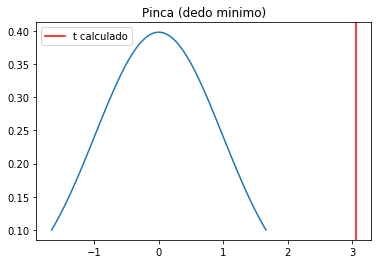

In [24]:
t_plot, p_plot, degFree = result[0], result[1], result[3]
eixo_x = numpy.linspace(stats.t.ppf(alfa, degFree),stats.t.ppf(1-alfa,degFree),70)
figure, ax = plt.subplots(1,1)
ax.set_title("Pinca (dedo minimo)")
ax.plot(eixo_x,stats.t.pdf(eixo_x,degFree))
plt.axvline(x=t_plot, color='#ff0000', label="t calculado")
ax.legend(loc='best')
plt.show()

In [14]:
calcular_testes(dictMaoDireita,dictDireitaGoniometro,"Direita")
calcular_testes(dictMaoEsquerda,dictEsquerdaGoniometro,"Esquerda")

In [13]:
def desvio_padrao_quad(lista,media):
    somatorio=0
    for var in lista:
        somatorio += math.pow(var - media,2)
    return somatorio/(len(lista)-1)
    

In [15]:
 dictTabelaResultadosTesteDireita

{'Abdu\xc3\xa7\xc3\xa3o': {'Anelar': {'M\xc3\xa9dia Leap': 7.811111111111111,
   'M\xc3\xa9dia goni\xc3\xb4metro': 11.13888888888889,
   'T calculado': -2.8138136622646464,
   'Valor cr\xc3\xadtico t': 1.6643714090726742,
   'p-valor': 0.006175963586876776},
  'Indicador': {'M\xc3\xa9dia Leap': 11.624,
   'M\xc3\xa9dia goni\xc3\xb4metro': 10.26923076923077,
   'T calculado': 1.4836142226510936,
   'Valor cr\xc3\xadtico t': 1.6710930318274826,
   'p-valor': 0.14323404427162578},
  'Mindinho': {'M\xc3\xa9dia Leap': 11.177333333333333,
   'M\xc3\xa9dia goni\xc3\xb4metro': 12.342857142857143,
   'T calculado': -1.4371907116089164,
   'Valor cr\xc3\xadtico t': 1.6646246444385238,
   'p-valor': 0.15466329636765752},
  'M\xc3\xa9dio': {'M\xc3\xa9dia Leap': 11.049000000000001,
   'M\xc3\xa9dia goni\xc3\xb4metro': 9.84,
   'T calculado': 1.9780208057803816,
   'Valor cr\xc3\xadtico t': 1.6694022215079607,
   'p-valor': 0.05230377640473427}},
 'Extens\xc3\xa3o': {'Anelar': {'M\xc3\xa9dia Leap': 

In [16]:
dataframe_resultados1 = pd.DataFrame.from_dict(dictTabelaResultadosTesteDireita)
dataframe_resultados2 = pd.DataFrame.from_dict(dictTabelaResultadosTesteEsquerda)


In [17]:
dataframe_resultados1.to_csv("TesteTDireita.csv", sep=',',encoding='utf-8')
dataframe_resultados2.to_csv("TesteTEsquerda.csv", sep=',',encoding='utf-8')

In [104]:
numpy.mean((dictMaoDireita["Mindinho"]["Abdução"]-dictDireitaGoniometro["Mindinho"]["Abdução"])**2)
#def calcular_mse(lista1,lista2):
 #   media1 = lista1.mean()
 #   media2 = lista2.mean()
 #   somatorio = 0
 #   for i in lista

ValueError: operands could not be broadcast together with shapes (45,) (35,) 